In [1]:
# ██████╗  ██████╗  ███╗   ██╗ ███████╗ ██╗  ██████╗  ██╗   ██╗ ██████╗   █████╗  ████████╗ ██╗  ██████╗  ███╗   ██╗ 
#██╔════╝ ██╔═══██╗ ████╗  ██║ ██╔════╝ ██║ ██╔════╝  ██║   ██║ ██╔══██╗ ██╔══██╗ ╚══██╔══╝ ██║ ██╔═══██╗ ████╗  ██║ 
#██║      ██║   ██║ ██╔██╗ ██║ █████╗   ██║ ██║  ███╗ ██║   ██║ ██████╔╝ ███████║    ██║    ██║ ██║   ██║ ██╔██╗ ██║ 
#██║      ██║   ██║ ██║╚██╗██║ ██╔══╝   ██║ ██║   ██║ ██║   ██║ ██╔══██╗ ██╔══██║    ██║    ██║ ██║   ██║ ██║╚██╗██║ 
#╚██████╗ ╚██████╔╝ ██║ ╚████║ ██║      ██║ ╚██████╔╝ ╚██████╔╝ ██║  ██║ ██║  ██║    ██║    ██║ ╚██████╔╝ ██║ ╚████║ 
# ╚═════╝  ╚═════╝  ╚═╝  ╚═══╝ ╚═╝      ╚═╝  ╚═════╝   ╚═════╝  ╚═╝  ╚═╝ ╚═╝  ╚═╝    ╚═╝    ╚═╝  ╚═════╝  ╚═╝  ╚═══╝ 
# global variables that are chagned often

#█▀▀ █▀▀ █▄ █ █▀▀ █▀█ ▄▀█ █   
#█▄█ ██▄ █ ▀█ ██▄ █▀▄ █▀█ █▄▄ 
#
#variable for skipping all the plotting code for debugging processing
plotting = True

#chose while taxi types to be processed
process_ywl = True
process_grn = True
process_fhv = True
process_hvf = False   #setting this to true adds 24hr processing

#limits data size and processes to be quicker (for testing only) 
testing = False
start_month = 3        #testing var default 2
number_of_months = 5   #testing var default 11
start_day = 60         #testing var default 32ish
number_of_days = 100     #testing var default 366


#█▀▄ ▄▀█ ▀█▀ ▄▀█    █▀▄ █ █▀█ 
#█▄▀ █▀█  █  █▀█    █▄▀ █ █▀▄ 
#

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#intermediate file names
processed_data_file = "_processed_data_"
tally_s1_file = "taxi_data_tallyed_s1.csv"
tally_s2_file = "taxi_data_tallyed_s2_neg.csv"

In [2]:
#setting up libs

import numpy as np
from scipy.stats import entropy
from math import e

from collections import OrderedDict

import random as random
np.random.seed(1)
from pprint import pprint

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.show() 
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.show() 

from scipy.stats import mode, chi2_contingency, pearsonr 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import datasets
from sklearn import svm

import warnings

warnings.filterwarnings("ignore")

In [3]:
# ██████╗  ██╗       ██████╗  ██████╗   █████╗  ██╗         ██╗   ██╗  █████╗  ██████╗  ███████╗ 
#██╔════╝  ██║      ██╔═══██╗ ██╔══██╗ ██╔══██╗ ██║         ██║   ██║ ██╔══██╗ ██╔══██╗ ██╔════╝ 
#██║  ███╗ ██║      ██║   ██║ ██████╔╝ ███████║ ██║         ██║   ██║ ███████║ ██████╔╝ ███████╗ 
#██║   ██║ ██║      ██║   ██║ ██╔══██╗ ██╔══██║ ██║         ╚██╗ ██╔╝ ██╔══██║ ██╔══██╗ ╚════██║ 
#╚██████╔╝ ███████╗ ╚██████╔╝ ██████╔╝ ██║  ██║ ███████╗     ╚████╔╝  ██║  ██║ ██║  ██║ ███████║ 
# ╚═════╝  ╚══════╝  ╚═════╝  ╚═════╝  ╚═╝  ╚═╝ ╚══════╝      ╚═══╝   ╚═╝  ╚═╝ ╚═╝  ╚═╝ ╚══════╝ 
# v2.2.1
# global variabels which can be tweeked

#█    ▀  █▀▀▄ █▀▀█ █▀▀█ █▀▀█ █  █ █▀▀ 
#█   ▀█▀ █▀▀▄ █▄▄▀ █▄▄█ █▄▄▀ █▄▄█ ▀▀█ 
#▀▀▀ ▀▀▀ ▀▀▀  ▀ ▀▀ ▀  ▀ ▀ ▀▀ ▄▄▄█ ▀▀▀ 
# imporint libarys used throughout

import time
import datetime

import pandas as pd
from numpy import log, sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from math import e

import os.path
from os.path import getsize
from urllib.request import urlretrieve

from pyspark.sql.functions import rand 
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.sql import SparkSession

import warnings

#variable for skipping all the plotting code for debugging processing
start_time = time.perf_counter()
start_time_og = time.perf_counter()


#▀█▀ ▄▀█ ▀▄▀ █    █▀▄ ▄▀█ ▀█▀ ▄▀█ 
# █  █▀█ █ █ █    █▄▀ █▀█  █  █▀█ 
#

#file location
file_base = "_tripdata_"

#indexs for each of the main data set types
ywl_i = 0 
grn_i = 1
fhv_i = 2
hvf_i = 3

#used to identify which taxis to process
process_taxi = [process_ywl, process_grn, process_fhv, process_hvf]

#names related to each cab type in order
taxi_file_names = ["yellow","green","fhv","fhvhv"]
full_names = ["yellow cabs", "green cabs", "for higher vheciles", "for higher high volume"]

#column names for each cab type in order
column_names = [
    ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
    ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
    ['dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag'],
    ['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag']
]

#2018 fhv files which was giving me trouble so added this schema for it
bad_fhv_schema = [2, 2018, ['Pickup_DateTime','DropOff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag','dispatching_base_number']]


#aliases for pickup time and dropoff time
pickup_time = ['tpep_pickup_datetime','lpep_pickup_datetime','pickup_datetime','pickup_datetime','Pickup_DateTime']
dropoff_time = ['tpep_dropoff_datetime','lpep_dropoff_datetime','dropoff_datetime','dropoff_datetime','DropOff_datetime']

#irrelavent collumns that can be dropped
irrelavent_columns = ['dispatching_base_number','DOtime','hvfhs_license_num','dispatching_base_num','VendorID','store_and_fwd_flag','extra','MTA_tax','improvement_surcharge','tip_amount','tolls_amount', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge']

#array, for all the taxi count colls
all_taxi_cols = [
        "2019_night", 
        "2019_morn",
        "2019_arvo",
        "2019_even",
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"
        ]

#array for 2020 taxi count colls
taxi_cols_2020 = [
        "2020_night", 
        "2020_morn",
        "2020_arvo",
        "2020_even"]


#▀█▀ ▄▀█ ▀▄▀ █    █   █▀█ █▀▀ ▄▀█ ▀█▀ █ █▀█ █▄ █ █▀ 
# █  █▀█ █ █ █    █▄▄ █▄█ █▄▄ █▀█  █  █ █▄█ █ ▀█ ▄█ 
#

#location processing variables
#locations that will be removed as considered invalid
bad_locations = [1,132,138,264,265]

#location of the location id file
location_file = "taxi+_zone_lookup.csv"

#list of boroughs names as in the location file
boroughs_locations = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island","EWR","Unknown"]



#█▀▄ █▀█ █ █ █ █▄ █ █   █▀█ ▄▀█ █▀▄ 
#█▄▀ █▄█ ▀▄▀▄▀ █ ▀█ █▄▄ █▄█ █▀█ █▄▀ 
#

#download directory 
download_dir = data_dir

#taxi data base url
taxi_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/"

#covid cases
covid_url = "https://data.cityofnewyork.us/api/views/rc75-m7u3/rows.csv?accessType=DOWNLOAD"
    
#location data
location_url = "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"

#█▀▄ ▄▀█ ▀█▀ █▀▀    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▀ █▀█  █  ██▄    █▄▀ ██▄ █▀  ▄█ 
#
months_in_year = 12

#years of data used
years = [2019, 2020]

#feb 2019 was when fhvhv file started
fhvhv_started = [2,2019] 

#late feb 2020 was when the first case of covid was observed in NYC
covid_started = [2,2020] 

#preprocessing arrays

#hours each day to seperate each count
day_time_breakdown = [0,6,12,18]

#day of the year covid started on
covid_start_day = int(datetime.datetime.strptime(
    " ".join([str(int) for int in covid_started]), 
    "%m %Y").__format__("%j"))

#pretty self explanitory
days_in_2020 = 366



#█▀█ █ █ ▀█▀ █   █ █▀▀ █▀█ █▀ 
#█▄█ █▄█  █  █▄▄ █ ██▄ █▀▄ ▄█ 
# values for calculating outliers

#all vals must be withing the .99 percent of data
outlier_percent = (1-.99)/2

#buffer for graphing and removing outliers from graphs
fare_amount_graph_buffer = 15

#accuracy when calculating the percentile
percentile_accuracy = 0.00001



#█▀▀ █▀█ █ █ █ █▀▄    █▀▄ █▀▀ █▀▀ █▀ 
#█▄▄ █▄█ ▀▄▀ █ █▄▀    █▄▀ ██▄ █▄▄ ▄█ 
#

#files
covid_restrictions_file = "covid_restrictions.csv"
covid_cases_file = "COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"

#list of boroughs as named in the covid file (same order)
covid_boroughs =["bx","bk","mn","qn","si"]



#█▀ █▀▀ ▀█▀ █ █ █▀█    █▀▀ █▀█ █▄ █ █▀▄ █ ▀█▀ █ █▀█ █▄ █ █▀ 
#▄█ ██▄  █  █▄█ █▀▀    █▄▄ █▄█ █ ▀█ █▄▀ █  █  █ █▄█ █ ▀█ ▄█ 
#

#plotting is using a yellow data set so must skip plotting if no yellow
if plotting:
    if not (process_taxi[ywl_i] and process_taxi[grn_i]):
        plotting = False
        
        
#if in a testing mode, sets up variables so file processes correctly         
if testing:
    
    #changes the download dir to not overwrite data
    download_dir =  data_dir.split("1/Data/")[0] + "1/TestDownload/"
    
    #changes some timing variabels to anaylise only what is needed for testing
    covid_started[0] = start_month
    months_in_year = start_month + number_of_months - 1
    graph_month = start_month
    days_in_2020 = start_day + number_of_days
else:
    
    #if not testing graphing month is 5 (so may)
    graph_month = 5
    
    
    
#█▀▄▀█ █ █▀ █▀▀    █▀▀ █ █ █▄ █ █▀▀ 
#█ ▀ █ █ ▄█ █▄▄    █▀  █▄█ █ ▀█ █▄▄ 
# specialized functions

#sets seed for when its used
seed = 1

# log function to deal with integer count data, added conditions to set any negative
# or 0 values to be 0
def logf(x):
    return (log(x) if x > 0 else 0)

#applys a log log others 0
def loglogf(x):
    return (log(log(x)) if x > e else 0)

#applys log log to an array
def loglogfa(arr):
    return [loglogf(x) for x in arr]

0       False
1       False
2       False
3       False
4        True
        ...  
3335    False
3336    False
3337    False
3338    False
3339    False
Length: 3340, dtype: bool

In [36]:
df["fhv"] == 0


0        True
1       False
2        True
3       False
4        True
        ...  
3335    False
3336     True
3337    False
3338     True
3339    False
Name: fhv, Length: 3340, dtype: bool

In [35]:
df["borough"] == 2

0       False
1       False
2       False
3       False
4        True
        ...  
3335     True
3336    False
3337    False
3338    False
3339    False
Name: borough, Length: 3340, dtype: bool

In [32]:

#main data directory
data_dir = "/mnt/e/2021/Applied Data Science/Project 1/Data/"

#list of boroughs names as in the location file
boroughs = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

df = pd.read_csv(data_dir + tally_s2_file)
#df = df.loc[df["fhv"] == 0]

In [40]:
df.loc[(df["borough"] == 2) & (df["fhv"] == 0)]

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,borough_case_count_7day_avg,borough_all_case_count_7day_avg,borough_hospitalized_count_7day_avg,borough_death_count_7day_avg,borough_all_death_count_7day_avg,stadium_capcity,restaurants,high_schools,indoor_religious,phase_1
4,4,32,6,4,2,0,10.745076,11.023421,11.640580,11.641336,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
14,14,33,0,5,2,0,10.918501,10.781453,11.484207,11.201497,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
24,24,34,1,5,2,0,9.233862,11.374870,11.445374,11.517127,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
34,34,35,2,5,2,0,9.335474,11.477464,11.530824,11.687013,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
44,44,36,3,5,2,0,9.632597,11.533414,11.612554,11.845318,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3294,361,6,51,2,0,9.972500,10.280930,11.059661,10.995008,...,6.016157,6.311735,3.433987,0.693147,1.098612,0.0,0.0,0.0,0.5,1.0
3304,3304,362,0,52,2,0,10.207658,10.134242,11.047169,10.820558,...,6.042633,6.342121,3.496508,1.098612,1.386294,0.0,0.0,0.0,0.5,1.0
3314,3314,363,1,52,2,0,9.222467,10.735853,11.232034,10.925795,...,6.059123,6.350886,3.526361,1.098612,1.386294,0.0,0.0,0.0,0.5,1.0
3324,3324,364,2,52,2,0,9.452188,10.558258,11.104897,11.135523,...,6.093570,6.375025,3.555348,1.386294,1.386294,0.0,0.0,0.0,0.5,1.0


array([0, 1, 2, 3, 4])

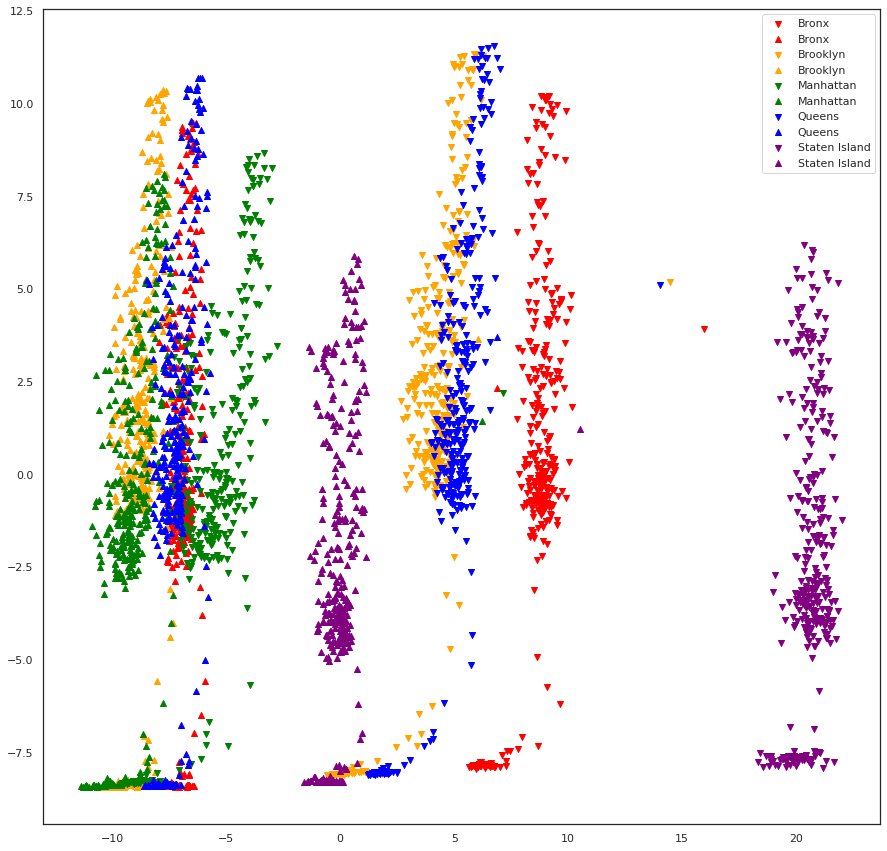

In [45]:
#showing low accuracies from the clustering point of view

#sets up and fits the PCA algorithm with 2 dimensions 
pca = PCA(n_components = 2)
s = pca.fit_transform(df[df.columns.difference(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv']).tolist()])

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
shapes = ["v" , "^"] #up then down
labels = boroughs

#plotting each class
for borough, colour, label in zip(np.unique(df["borough"]), colours, labels):
    for fhv, shape in zip(np.unique(df["fhv"]), shapes):
        plt.scatter(
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 0], 
            s[(df["borough"] == borough) & (df["fhv"] == fhv), 1],
            label=label, 
            c=colour,
            marker = shape
        )
    
#printing the plot
plt.legend()
plt.show()


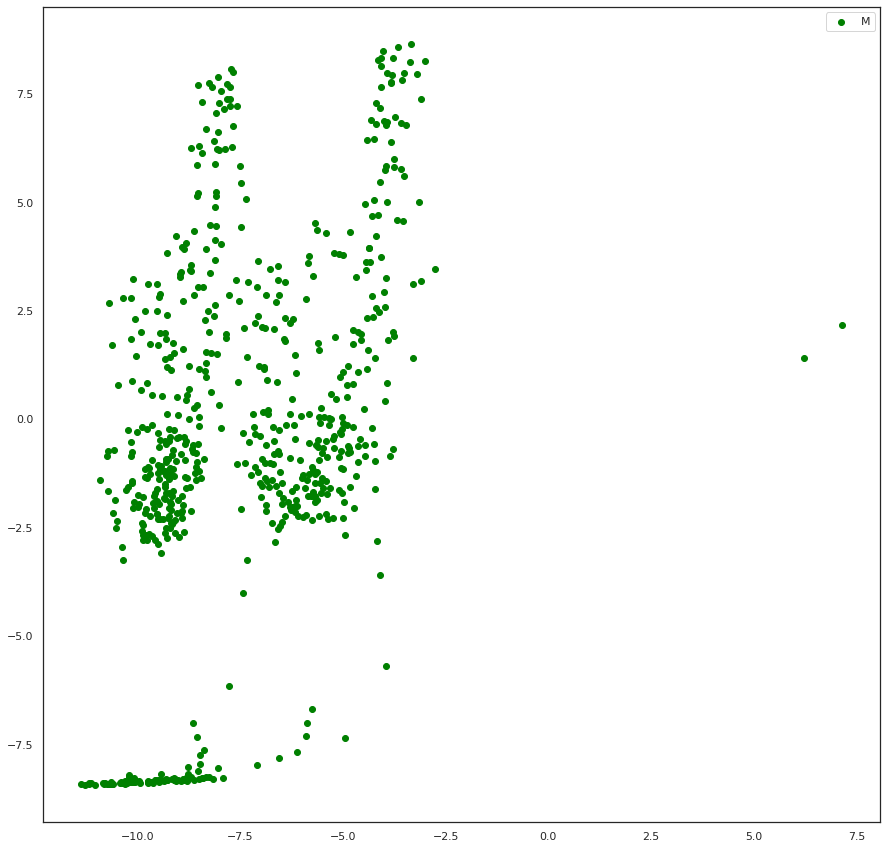

In [46]:
#showing low accuracies from the clustering point of view

df2 = df.loc[df["borough"] == 2]

#sets up and fits the PCA algorithm with 2 dimensions 
#pca = PCA(n_components = 2)
#s = pca.fit_transform(df2)

#creating colour scheme with each colour below representing its respective class label
colours = ["green"]
labels = boroughs[2]

#plotting each class
for clas, colour, label in zip(np.unique(df2["borough"]),colours,labels):
    plt.scatter(s[df["borough"]==clas, 0], s[df["borough"]==clas, 1], label=label, c=colour)
    
#printing the plot
plt.legend()
plt.show()


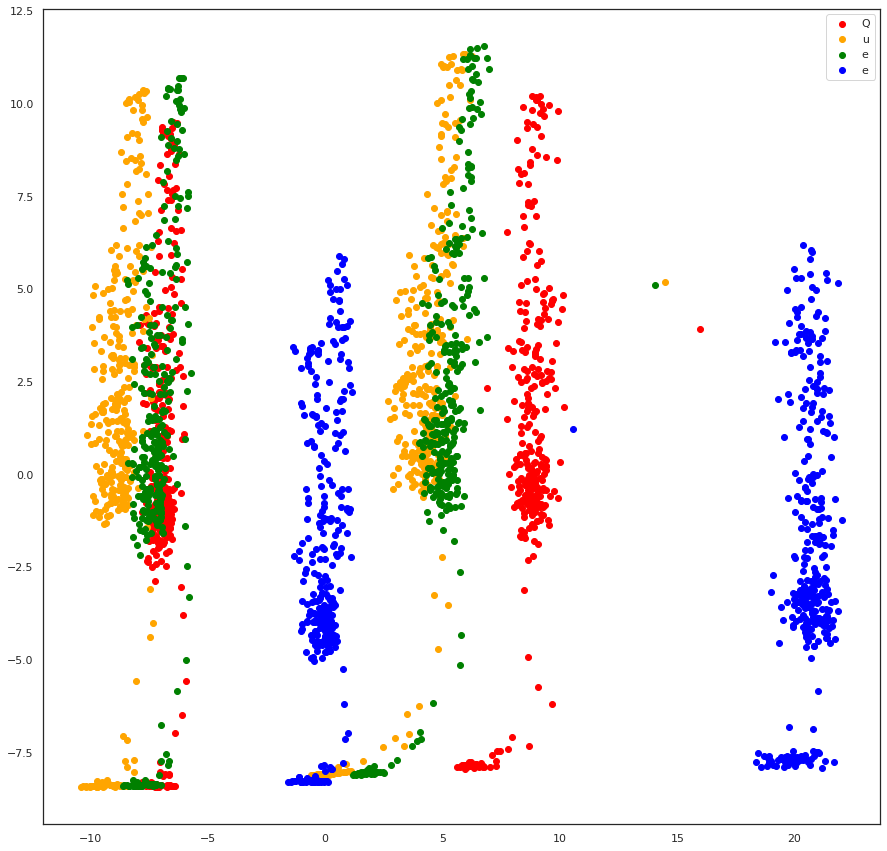

In [47]:
#showing low accuracies from the clustering point of view

df2 = df.loc[df["borough"] != 2]

#sets up and fits the PCA algorithm with 2 dimensions 
#pca = PCA(n_components = 2)
#s = pca.fit_transform(df2)

#creating colour scheme with each colour below representing its respective class label
colours = ["red", "orange", "green", "blue", "purple"]
labels = boroughs[-2]

#plotting each class
for clas, colour, label in zip(np.unique(df2["borough"]),colours,labels):
    plt.scatter(s[df["borough"]==clas, 0], s[df["borough"]==clas, 1], label=label, c=colour)
    
#printing the plot
plt.legend()
plt.show()

In [9]:
df.columns

Index(['Unnamed: 0', 'day_year', 'day_week', 'week', 'borough', 'fhv',
       '2019_night', '2019_morn', '2019_arvo', '2019_even', '2020_night',
       '2020_morn', '2020_arvo', '2020_even', 'borough_case_count',
       'borough_probable_case_count', 'borough_hospitalized_count',
       'borough_death_count', 'borough_probable_death_count',
       'borough_case_count_7day_avg', 'borough_all_case_count_7day_avg',
       'borough_hospitalized_count_7day_avg', 'borough_death_count_7day_avg',
       'borough_all_death_count_7day_avg', 'stadium_capcity', 'restaurants',
       'high_schools', 'indoor_religious', 'phase_1'],
      dtype='object')

In [10]:
df.corr()

,Unnamed: 0,day_year,day_week,week,borough,fhv,2019_night,2019_morn,2019_arvo,2019_even,...,borough_case_count_7day_avg,borough_all_case_count_7day_avg,borough_hospitalized_count_7day_avg,borough_death_count_7day_avg,borough_all_death_count_7day_avg,stadium_capcity,restaurants,high_schools,indoor_religious,phase_1
Unnamed: 0,1.000000,9.999957e-01,-2.613274e-03,9.997802e-01,2.933521e-03,NaN,-0.033402,-0.077250,-0.082361,-0.050188,...,0.483218,0.514973,0.133566,-0.237827,-0.234085,-5.626411e-01,-2.801719e-01,-1.241440e-01,-8.739055e-02,2.300853e-01
day_year,0.999996,1.000000e+00,-2.613285e-03,9.997845e-01,1.675010e-16,NaN,-0.032203,-0.075932,-0.081098,-0.048939,...,0.483598,0.515349,0.134205,-0.237507,-0.233745,-5.626435e-01,-2.801731e-01,-1.241445e-01,-8.739093e-02,2.300862e-01
day_week,-0.002613,-2.613285e-03,1.000000e+00,-2.337326e-02,1.088365e-17,NaN,0.034444,0.011281,0.010274,0.030150,...,-0.000352,-0.000481,-0.002120,-0.000991,-0.000622,-1.209292e-02,5.983881e-04,-7.443036e-03,-2.981925e-03,3.741013e-03
week,0.999780,9.997845e-01,-2.337326e-02,1.000000e+00,1.635564e-16,NaN,-0.032909,-0.076145,-0.081290,-0.049552,...,0.483475,0.515220,0.134213,-0.237422,-0.233669,-5.622407e-01,-2.801099e-01,-1.239565e-01,-8.730545e-02,2.299465e-01
borough,0.002934,1.675010e-16,1.088365e-17,1.635564e-16,1.000000e+00,NaN,-0.408853,-0.449630,-0.430601,-0.425854,...,-0.128826,-0.127415,-0.217686,-0.109503,-0.116221,-2.132815e-16,-1.800232e-16,-1.039887e-16,-2.007900e-16,-1.508130e-16
fhv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019_night,-0.033402,-3.220273e-02,3.444393e-02,-3.290912e-02,-4.088534e-01,NaN,1.000000,0.962585,0.974077,0.977219,...,0.138972,0.136076,0.212342,0.117839,0.121686,1.641300e-02,1.600660e-02,9.633606e-03,6.069177e-03,-6.112933e-03
2019_morn,-0.077250,-7.593169e-02,1.128101e-02,-7.614540e-02,-4.496300e-01,NaN,0.962585,1.000000,0.989001,0.982330,...,0.093884,0.090187,0.173303,0.103449,0.106489,5.105571e-02,3.826343e-02,2.862924e-02,1.731008e-02,-6.115073e-03
2019_arvo,-0.082361,-8.109848e-02,1.027375e-02,-8.128989e-02,-4.306008e-01,NaN,0.974077,0.989001,1.000000,0.986737,...,0.092269,0.088451,0.173152,0.103257,0.106452,5.178410e-02,3.522277e-02,2.300886e-02,1.578093e-02,-9.552019e-03
2019_even,-0.050188,-4.893904e-02,3.015024e-02,-4.955177e-02,-4.258538e-01,NaN,0.977219,0.982330,0.986737,1.000000,...,0.124646,0.121257,0.200977,0.112710,0.116727,2.832864e-02,2.028664e-02,1.512249e-02,5.736637e-03,-9.410331e-03


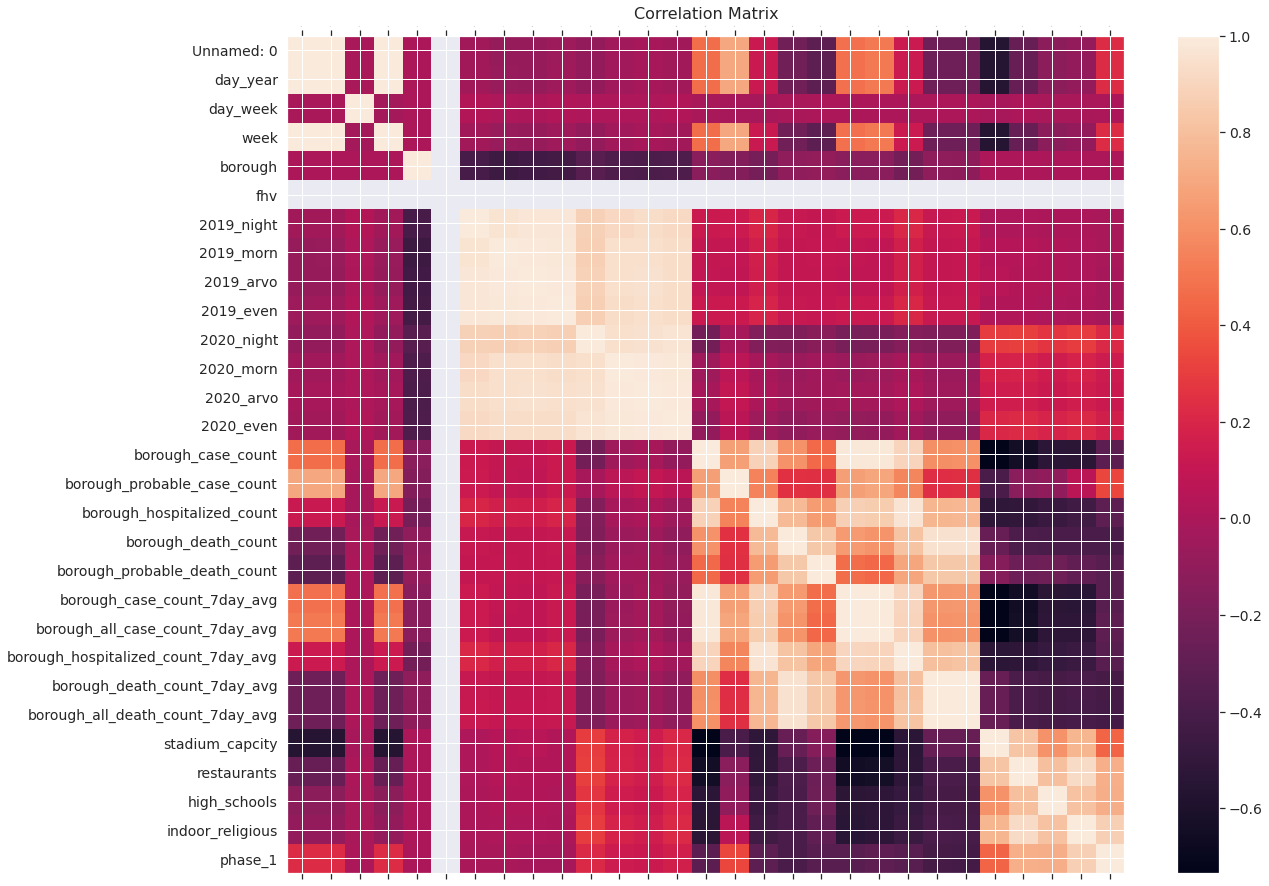

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

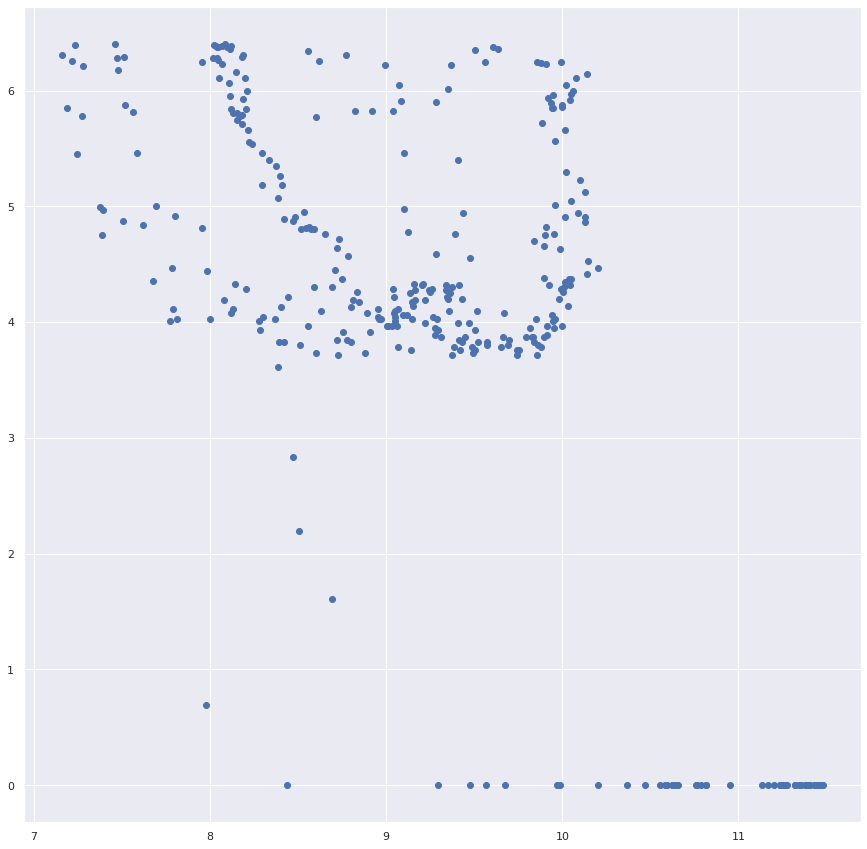

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)

dft = df.loc[df["borough"] == 2]

#N = 50
x = dft["2020_morn"]
y = dft["borough_all_case_count_7day_avg"]
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y)#, c=colors, alpha=0.5)
plt.show()

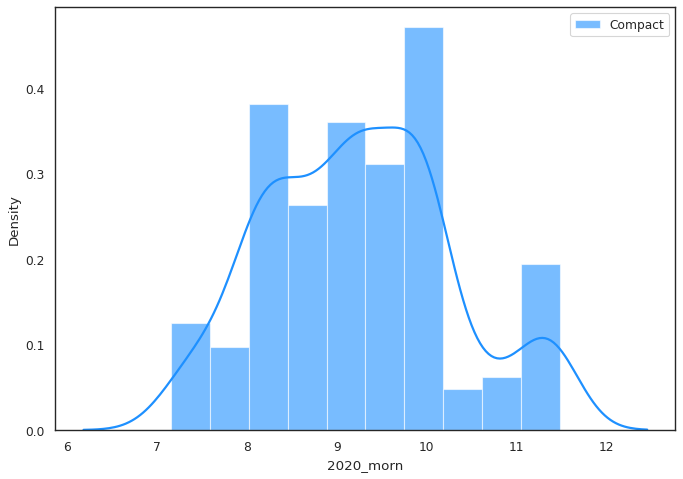

In [13]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
#plt.xlim(50,75)
plt.legend();

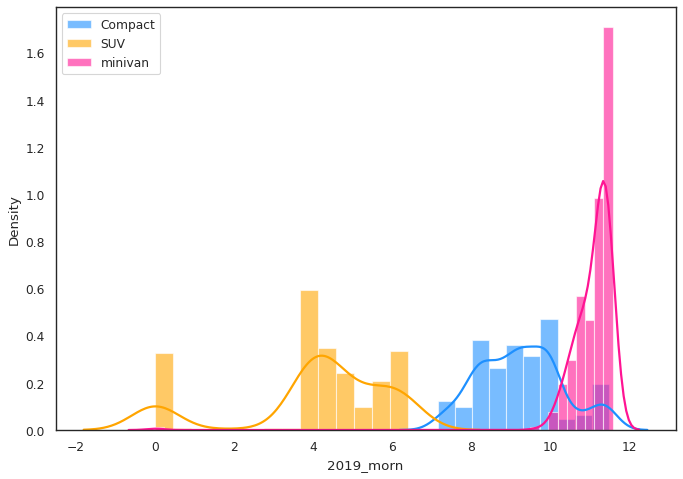

In [14]:
import seaborn as sns
sns.set_style("white")

# Import data
x1 = dft["2020_morn"]
x2 = dft["borough_all_case_count_7day_avg"]
x3 = dft["2019_morn"]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(x2, color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
#plt.xlim(50,75)
plt.legend();

KeyError: "None of [Index(['total_all_case_count_7day_avg', 'total_hospitalized_count_7day_avg',\n       'total_all_death_count_7day_avg'],\n      dtype='object')] are in the [columns]"

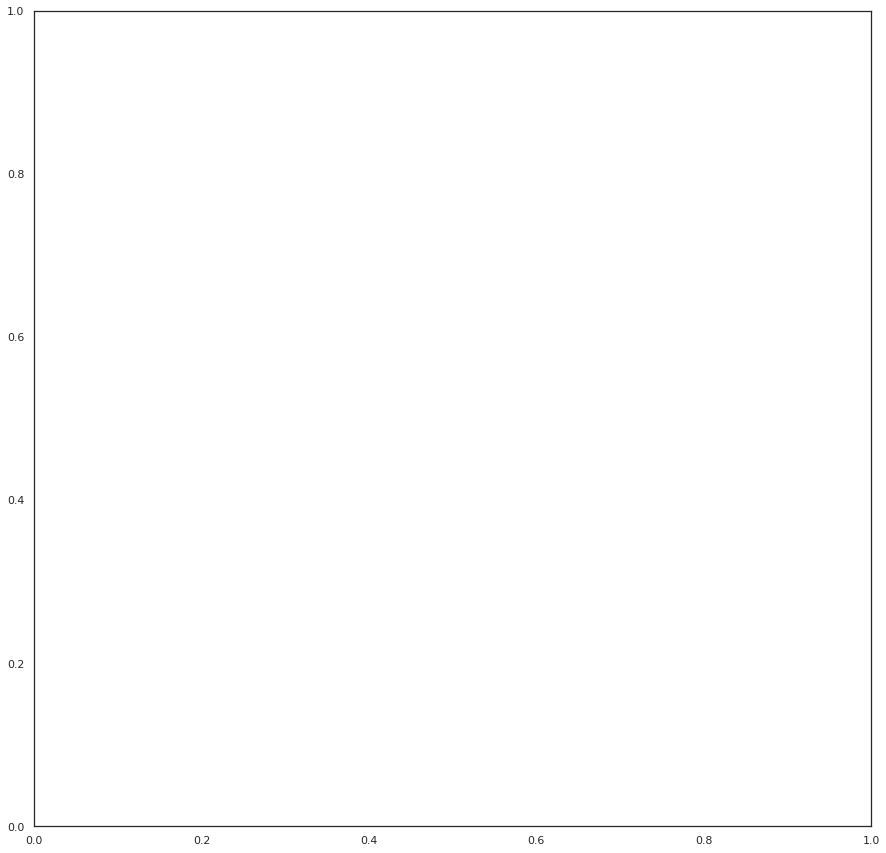

In [15]:
fig, ax = plt.subplots()
#xticks = (dft["week"]*(366/52) + dft["day"])
#lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")


dft[[
     'total_all_case_count_7day_avg', 
     'total_hospitalized_count_7day_avg',
     'total_all_death_count_7day_avg',
]].plot(ax = ax)


ax.set_yscale('log')

fig2, ax2 = plt.subplots()
dft[[
     'borough_all_case_count_7day_avg', 
     'borough_hospitalized_count_7day_avg',
     'borough_all_death_count_7day_avg'
        ]].plot(ax = ax2)
ax2.set_yscale('log')





In [ ]:
covid_cols = [
     'total_probable_case_count',
     'borough_probable_case_count',
    
     'total_case_count_7day_avg',
     'borough_case_count_7day_avg',
     'total_all_case_count_7day_avg', 
     'borough_all_case_count_7day_avg', 
     'total_case_count', 
     'borough_case_count', 

     'total_death_count_7day_avg', 
     'borough_death_count_7day_avg', 
     'total_all_death_count_7day_avg',
     'borough_all_death_count_7day_avg',
     'total_death_count', 
     'borough_death_count', 
     'total_probable_death_count',
     'borough_probable_death_count',
    
    
     'total_hospitalized_count_7day_avg',
     'borough_hospitalized_count_7day_avg',
     'total_hospitalized_count', 
     'borough_hospitalized_count', 
]

dfs = dft[covid_cols]




f = plt.figure(figsize=(19, 15))
plt.matshow(dfs.corr(), fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), fontsize=0, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#correlation between taxi numbers in different boroughs

In [ ]:
dft[["borough_case_count"]]

In [ ]:
dft[["2020_morn","borough_case_count"]].plot(subplots=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

fig, ax = plt.subplots()
xticks = (dft["day_year"])

ax.set_xticklabels = xticks
ax.set_xticks = xticks
#ax.set_xticks()

lns1 = ax.plot(xticks, dft[["2020_morn"]], color = 'green', label = "2020_morn")
ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()
lns2 = ax2.plot(xticks, dft[["borough_case_count"]], color = 'blue', label = 'borough_case_count')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='blue')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
#ax.legend(loc = "upper right")
#ax2.legend(loc = "upper right")

#dft[["2020_morn"]].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
#dft[["borough_case_count"]].plot(ax=ax, style='r-',  secondary_y=True)

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis

In [ ]:
day_parts_2020 = ["2020_night","2020_morn","2020_arvo","2020_even"]
column_temp1 = covid_cols.copy()
column_temp1.extend(day_parts_2020)

dfs = dft[column_temp1].corr()[day_parts_2020]#[covid_cols, day_parts_2020]


f = plt.figure(figsize=(19, 15))
plt.matshow(abs(dfs), fignum=f.number)
plt.xticks(range(dfs.select_dtypes(['number']).shape[1]), dfs.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfs.select_dtypes(['number']).shape[0]), dfs.select_dtypes(['number']).index, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
dft["week"].values()

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(df)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=range(0,len(df.columns)), ticklabels=df.columns)
ax.yaxis.set(ticks=range(0,len(df.columns)), ticklabels=df.columns)
ax.set_ylim(10, -10)
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        ax.text(j, i, df.iloc[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [ ]:
#Have to use SVD instead of PCA as the data is not in a standard array
SVD = TruncatedSVD(n_components = 4)
s = SVD.fit_transform(X_train_x2)

#creating colour array
colours = ["red", "orange", "green"]
colouring = [colours[round((i)/2+1/2)-1] for i in trn_cls]

#adding colour label to the legend
plt.scatter(0,0,c='red',label='1/5')
plt.scatter(0,0,c='orange',label='3/5')
plt.scatter(0,0,c='green',label='5/5')

#plotting the data
plt.scatter(s[:,2],s[:,3],c=colouring)

#printing the plot
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

fig = plt.figure()
data = np.clip(randn(250,250),-1,1)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
data = np.clip(randn(250,250),-1,1)
data = np.ma.masked_where(data > 0.5, data)


fig, ax1 = plt.subplots(1,1)

im = ax1.imshow(data, interpolation='nearest')
cb = plt.colorbar(im)

fg_color = 'white'
bg_color = 'black'

# IMSHOW    
# set title plus title color
ax1.set_title('ax1 title', color=fg_color)

# set figure facecolor
ax1.patch.set_facecolor(bg_color)

# set tick and ticklabel color
im.axes.tick_params(color=fg_color, labelcolor=fg_color)

# set imshow outline
for spine in im.axes.spines.values():
    spine.set_edgecolor(fg_color)    

# COLORBAR
# set colorbar label plus label color
cb.set_label('colorbar label', color=fg_color, fontsize=24)
cb.ax.tick_params(labelsize=24)
# set colorbar tick color
cb.ax.yaxis.set_tick_params(color=fg_color)

# set colorbar edgecolor 
cb.outline.set_edgecolor(fg_color)

# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

fig.patch.set_facecolor(bg_color)    
plt.tight_layout()
plt.show()
#plt.savefig('save/to/pic.png', dpi=200, facecolor=bg_color)